# Final Project 
# - Linear Econometrics for Finance
- Group 6: Peng Liu, Hao Yuan, Chengyi Xu, Chenyu Zhao, Yuchen Wang
- 12/18/2022

## Table of Contensts
1. Preparation
2. Individual Stock CAPM Analysis - Pre-Covid
3. Indivisual Stock CAPM Analysis - Post-Covid
4. Portofolio Weight Selection
5. Portofolio CAPM Analysis
6. Portofolio Fama French Analysis
7. OLS Assumptions
8. Ratios Comparison (CAPM / Fama French)
9. Portofolio / Individual Perfomance Comparison (Pre / Post Covid)

# 1. Preparation

In [1]:
import yfinance as yf
import wrds
import pandas as pd
import numpy as np
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols

In [2]:
#fama french
df_ff=pd.read_excel("fama_french-1.xlsx")
#AFTER COVID
aft_covid_prc=pd.read_csv('data_aft.csv')
#pre_covid data
pre_covid_prc=pd.read_csv('data2.csv')

In [3]:
df_ff['datevec'] = pd.to_datetime(df_ff['datevec'].astype(str))
df_ff = df_ff[(df_ff['datevec']>=pd.Timestamp('2015-01-01 00:00:00')) & 
          (df_ff['datevec']<=pd.Timestamp('2020-02-01 00:00:00'))].reset_index(drop = True)

df_ff['ind1']= 100* (pre_covid_prc['AAPL']/pre_covid_prc['AAPL'].shift(1) - 1)
df_ff['ind2']= 100* (pre_covid_prc['BA']/pre_covid_prc['BA'].shift(1) - 1)
df_ff['ind3']= 100* (pre_covid_prc['AMZN']/pre_covid_prc['AMZN'].shift(1) - 1)
df_ff['ind4']= 100* (pre_covid_prc['GOOG']/pre_covid_prc['GOOG'].shift(1) - 1)
df_ff['ind5']= 100* (pre_covid_prc['MSFT']/pre_covid_prc['MSFT'].shift(1) - 1)
df_ff['ind6']= 100* (pre_covid_prc['S&P']/pre_covid_prc['S&P'].shift(1) - 1)

df_ff['mkt']= 100* (pre_covid_prc['S&P']/pre_covid_prc['S&P'].shift(1) - 1)
df_ff['mktrf']= df_ff['mkt'] - df_ff['rf']

df_ff['aapler']= df_ff['ind1'] - df_ff['rf']
df_ff['baer']= df_ff['ind2'] - df_ff['rf']
df_ff['amzner']= df_ff['ind3'] - df_ff['rf']
df_ff['googer']= df_ff['ind4'] - df_ff['rf']
df_ff['msfter']= df_ff['ind5'] - df_ff['rf']
df_ff['sper']= df_ff['ind6'] - df_ff['rf']

df_ff= df_ff.drop([0], axis=0)

# 2. Individual Stock CAPM Analysis - Pre-Covid

In [4]:
pre_covid_prc.set_index('Date',inplace=True)

In [5]:
#AAPL
formula = 'aapler ~ mktrf'
aapl_ind = smf.ols(formula, df_ff).fit()
print(aapl_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = aapl_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 aapler   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.51
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.09e-07
Time:                        01:42:38   Log-Likelihood:                -196.59
No. Observations:                  61   AIC:                             397.2
Df Residuals:                      59   BIC:                             401.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9344      0.803      1.164      0.2

In [6]:
#BA
formula = 'baer ~ mktrf'
ba_ind = smf.ols(formula, df_ff).fit()
print(ba_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = ba_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                   baer   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.88e-07
Time:                        01:42:38   Log-Likelihood:                -199.74
No. Observations:                  61   AIC:                             403.5
Df Residuals:                      59   BIC:                             407.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6636      0.845      0.785      0.4

In [7]:
#AMZN
formula = 'amzner ~ mktrf'
amzn_ind = smf.ols(formula, df_ff).fit()
print(amzn_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = amzn_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 amzner   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     48.96
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.74e-09
Time:                        01:42:38   Log-Likelihood:                -195.93
No. Observations:                  61   AIC:                             395.9
Df Residuals:                      59   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0517      0.794      2.584      0.0

In [8]:
#GOOG
formula = 'googer ~ mktrf'
goog_ind = smf.ols(formula, df_ff).fit()
print(goog_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = goog_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 googer   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     36.39
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.14e-07
Time:                        01:42:38   Log-Likelihood:                -179.65
No. Observations:                  61   AIC:                             363.3
Df Residuals:                      59   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9679      0.608      1.592      0.1

In [9]:
#MSFT
formula = 'msfter ~ mktrf'
msft_ind = smf.ols(formula, df_ff).fit()
print(msft_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = msft_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 msfter   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     49.87
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.13e-09
Time:                        01:42:38   Log-Likelihood:                -175.75
No. Observations:                  61   AIC:                             355.5
Df Residuals:                      59   BIC:                             359.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8696      0.570      3.278      0.0

In [10]:
#S&P
formula = 'sper ~ mktrf'
sp_ind = smf.ols(formula, df_ff).fit()
print(sp_ind.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = sp_ind.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                   sper   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.169e+32
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:42:38   Log-Likelihood:                 1994.1
No. Observations:                  61   AIC:                            -3984.
Df Residuals:                      59   BIC:                            -3980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.331e-16   2.03e-16      1.639      0.1

In [11]:
#print out the alpha and beta results
# create a dictionary with the data
pre_covid_coefficients = {
    'stock': ['AAPL', 'BA', 'AMZN','GOOG','MSFT','S&P'],
    'alpha': [aapl_ind.params['Intercept'],ba_ind.params['Intercept'],amzn_ind.params['Intercept'],goog_ind.params['Intercept'], msft_ind.params['Intercept'],sp_ind.params['Intercept']],
    'beta':[aapl_ind.params['mktrf'],ba_ind.params['mktrf'],amzn_ind.params['mktrf'],goog_ind.params['mktrf'],msft_ind.params['mktrf'],sp_ind.params['mktrf']]
}

# create a dataframe from the dictionary
pre_covid_coefficients = pd.DataFrame(pre_covid_coefficients)

pre_covid_coefficients['alpha'] = pre_covid_coefficients['alpha'].apply(lambda x: round(x, 4))
pre_covid_coefficients['beta'] = pre_covid_coefficients['beta'].apply(lambda x: round(x, 4))
# view the dataframe
print(pre_covid_coefficients)

  stock   alpha    beta
0  AAPL  0.9344  1.3033
1    BA  0.6636  1.3198
2  AMZN  2.0517  1.5354
3  GOOG  0.9679  1.0137
4  MSFT  1.8696  1.1132
5   S&P  0.0000  1.0000


# 3. Indivisual Stock CAPM Analysis - Post-Covid

In [12]:
aft_covid_prc.set_index('Date',inplace=True)

In [13]:
Return_us_aft=100*((aft_covid_prc/aft_covid_prc.shift(1))-1)
Return_us_aft=Return_us_aft.dropna()

In [14]:
risk_free_aft = yf.download("^TNX", start='2020-01-01', end='2020-12-31',interval = '1mo')
Return_us_aft['rf'] = 100* (risk_free_aft['Adj Close']/risk_free_aft['Adj Close'].shift(1) - 1)
Return_us_aft['AAPff_modelf'] =Return_us_aft['AAPL']-Return_us_aft['rf']
Return_us_aft['BArf'] =Return_us_aft['BA']-Return_us_aft['rf']
Return_us_aft['AMZNrf'] =Return_us_aft['AMZN']-Return_us_aft['rf']
Return_us_aft['GOOGrf'] =Return_us_aft['GOOG']-Return_us_aft['rf']
Return_us_aft['MSFTrf'] =Return_us_aft['MSFT']-Return_us_aft['rf']
Return_us_aft['SPrf'] =Return_us_aft['S&P']-Return_us_aft['rf']

[*********************100%***********************]  1 of 1 completed


In [15]:
#AAPL
formula = 'AAPff_modelf ~ SPrf'
aapl_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(aapl_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = aapl_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:           AAPff_modelf   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     61.07
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.67e-05
Time:                        01:42:39   Log-Likelihood:                -36.601
No. Observations:                  11   AIC:                             77.20
Df Residuals:                       9   BIC:                             78.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1058      2.308      1.779      0.1

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
#BA
formula = 'BArf ~ SPrf'
ba_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(ba_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = ba_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                   BArf   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     4.756
Date:                Mon, 19 Dec 2022   Prob (F-statistic):             0.0571
Time:                        01:42:39   Log-Likelihood:                -47.122
No. Observations:                  11   AIC:                             98.24
Df Residuals:                       9   BIC:                             99.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3718      6.006     -0.228      0.8

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
#AMZN
formula = 'AMZNrf ~ SPrf'
amzn_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(amzn_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = amzn_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 AMZNrf   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     95.56
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.32e-06
Time:                        01:42:39   Log-Likelihood:                -36.440
No. Observations:                  11   AIC:                             76.88
Df Residuals:                       9   BIC:                             77.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3517      2.274      1.034      0.3

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
#GOOG
formula = 'GOOGrf ~ SPrf'
goog_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(goog_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = goog_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 GOOGrf   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.22e-06
Time:                        01:42:39   Log-Likelihood:                -31.962
No. Observations:                  11   AIC:                             67.92
Df Residuals:                       9   BIC:                             68.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0411      1.514      0.688      0.5

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
#MSFT
formula = 'MSFTrf ~ SPrf'
msft_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(msft_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = msft_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                 MSFTrf   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.40e-06
Time:                        01:42:39   Log-Likelihood:                -33.035
No. Observations:                  11   AIC:                             70.07
Df Residuals:                       9   BIC:                             70.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9816      1.669      0.588      0.5

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
#SP
formula = 'SPrf ~ SPrf'
sp_ind_aft = smf.ols(formula, Return_us_aft).fit()
print(sp_ind_aft.summary())
# F-test: hypothesis testing
hypotheses = 'SPrf = 1'
f_test = sp_ind_aft.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                   SPrf   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.197e+31
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.53e-139
Time:                        01:42:39   Log-Likelihood:                 341.18
No. Observations:                  11   AIC:                            -678.4
Df Residuals:                       9   BIC:                            -677.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0   2.81e-15          0      1.0

/Users/chengyixu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
#print out the alpha and beta results post covid
# create a dictionary with the data
post_covid_coefficients = {
    'stock': ['AAPL', 'BA', 'AMZN','GOOG','MSFT','S&P'],
    'alpha': [aapl_ind_aft.params['Intercept'],ba_ind_aft.params['Intercept'],amzn_ind_aft.params['Intercept'],goog_ind_aft.params['Intercept'], msft_ind_aft.params['Intercept'],sp_ind_aft.params['Intercept']],
    'beta':[aapl_ind_aft.params['SPrf'],ba_ind_aft.params['SPrf'],amzn_ind_aft.params['SPrf'],goog_ind_aft.params['SPrf'],msft_ind_aft.params['SPrf'],sp_ind_aft.params['SPrf']]
}

# create a dataframe from the dictionary
post_covid_coefficients = pd.DataFrame(post_covid_coefficients)

post_covid_coefficients['alpha'] = post_covid_coefficients['alpha'].apply(lambda x: round(x, 4))
post_covid_coefficients['beta'] = post_covid_coefficients['beta'].apply(lambda x: round(x, 4))

# view the dataframe
print(post_covid_coefficients)

  stock   alpha    beta
0  AAPL  4.1058  0.9923
1    BA -1.3718  0.7206
2  AMZN  2.3517  1.2232
3  GOOG  1.0411  0.8820
4  MSFT  0.9816  1.0267
5   S&P  0.0000  1.0000


# 4. Portfolio Weight Selection

In [22]:
#Find the period Market Return
MKT = df_ff["mkt"].mean()
RF  = df_ff["rf"].mean()

In [23]:
#construct cov matrix, it is
cov_matrix = pre_covid_prc.pct_change().cov()
cov_matrix

,AAPL,BA,AMZN,GOOG,MSFT,S&P
AAPL,0.005953,0.001196,0.002335,0.001943,0.002409,0.001687
BA,0.001196,0.006400,0.002350,0.001476,0.001468,0.001701
AMZN,0.002335,0.002350,0.006696,0.003253,0.003121,0.001974
GOOG,0.001943,0.001476,0.003253,0.003472,0.002243,0.001305
MSFT,0.002409,0.001468,0.003121,0.002243,0.003494,0.001437
S&P,0.001687,0.001701,0.001974,0.001305,0.001437,0.001291


In [24]:
#corr matrix
corr_matrix = pre_covid_prc.pct_change().corr()
corr_matrix

,AAPL,BA,AMZN,GOOG,MSFT,S&P
AAPL,1.000000,0.193828,0.369877,0.427497,0.528198,0.608732
BA,0.193828,1.000000,0.358955,0.313102,0.310462,0.591733
AMZN,0.369877,0.358955,1.000000,0.674714,0.645122,0.671393
GOOG,0.427497,0.313102,0.674714,1.000000,0.643935,0.616661
MSFT,0.528198,0.310462,0.645122,0.643935,1.000000,0.676870
S&P,0.608732,0.591733,0.671393,0.616661,0.676870,1.000000


In [25]:
#calculate period returns
ind_er = pre_covid_prc.pct_change().sum()
ind_er

AAPL    1.118511
BA      0.959633
AMZN    1.888478
GOOG    1.028608
MSFT    1.616511
S&P     0.432942
dtype: float64

In [26]:
#Calculate the Betas
betas = cov_matrix['S&P'] / cov_matrix.loc['S&P','S&P']
betas

AAPL    1.307278
BA      1.317673
AMZN    1.529266
GOOG    1.011407
MSFT    1.113708
S&P     1.000000
Name: S&P, dtype: float64

In [27]:
#create the portofilio

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(pre_covid_prc.columns)
num_portfolios = 3000

for portfolio in range(num_portfolios):
    weights = []
    for portfolio in range(num_portfolios):
        weight = np.random.uniform(-2, 2, num_assets)
        weight = weight/np.sum(weight)
        if all(value < 2 and value > -2 for value in weight):
            weights = weight
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(252) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(pre_covid_prc.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [28]:
#adjust the portofolio with more metrics need work
portfolios  = pd.DataFrame(data)
portfolios['Sharpe'] = (portfolios['Returns'] - RF)/ portfolios['Volatility']

portfolios['Treynor'] = (portfolios['Returns'] - RF)/ (
    portfolios['AAPL weight'] * betas.iloc[0] +
    portfolios['BA weight'] * betas.iloc[1] +
    portfolios['AMZN weight'] * betas.iloc[2] +
    portfolios['GOOG weight'] * betas.iloc[3] +
    portfolios['MSFT weight'] * betas.iloc[4] +
    portfolios['S&P weight'] * betas.iloc[5])

portfolios['Jensen'] = portfolios['Returns'] - RF - (
     portfolios['AAPL weight'] * betas.iloc[0] +
    portfolios['BA weight'] * betas.iloc[1] +
    portfolios['AMZN weight'] * betas.iloc[2] +
    portfolios['GOOG weight'] * betas.iloc[3] +
    portfolios['MSFT weight'] * betas.iloc[4] +
    portfolios['S&P weight'] * betas.iloc[5] 
    )* (MKT - RF)

portfolios.sort_values(by=['Returns'], ascending = False)
# Dataframe of the 10000 portfolios created
# the first one provides the highest Sharpe Ratio

,Returns,Volatility,AAPL weight,BA weight,AMZN weight,GOOG weight,MSFT weight,S&P weight,Sharpe,Treynor,Jensen
527,4.471090,2.963237,1.128386,-1.000564,1.631787,-0.946793,1.673242,-1.486058,1.480141,2.116814,3.091723
2586,4.441013,3.679425,1.886860,-1.573090,1.824442,0.019487,0.740035,-1.897733,1.183862,2.044992,3.025377
2933,4.415020,2.926533,-0.585150,-0.755135,1.680142,0.759467,1.591007,-1.690331,1.479545,2.609773,3.293551
1885,4.233448,3.682932,-0.724377,-1.530423,1.844859,1.911526,1.080872,-1.582457,1.126376,2.937167,3.266116
1452,4.001257,2.798526,-0.589406,-0.893570,1.275253,1.064601,1.649846,-1.506723,1.399371,2.777987,3.035583
...,...,...,...,...,...,...,...,...,...,...,...
2207,-1.449852,2.095892,-1.027735,0.950802,-1.660919,1.524639,-0.143328,1.356541,-0.732353,-14.176852,-1.602566
2578,-1.455006,2.322513,-0.189110,1.552003,-1.044935,-0.271244,-0.754678,1.707965,-0.663113,-1.942190,-2.035420
1834,-1.681400,3.204142,1.479719,1.930374,-1.196340,-0.513126,-1.773056,1.072429,-0.551312,-1.439360,-2.533106
2389,-2.043581,2.550931,0.589834,1.469570,-1.605463,0.783273,-1.507866,1.270653,-0.834465,-3.347753,-2.525851


In [29]:
#Lowest Volaitity Ratio Portofolio
max_ret_port = portfolios.iloc[portfolios['Returns'].idxmax()]
# idxmin() gives us the minimum value in the column specified.                               
max_ret_port

Returns        4.471090
Volatility     2.963237
AAPL weight    1.128386
BA weight     -1.000564
AMZN weight    1.631787
GOOG weight   -0.946793
MSFT weight    1.673242
S&P weight    -1.486058
Sharpe         1.480141
Treynor        2.116814
Jensen         3.091723
Name: 527, dtype: float64

# 5. Portofolio CAPM Analysis

In [30]:
#create portofolio excess returns
r1 = (
    100*(pre_covid_prc['AAPL']/pre_covid_prc['AAPL'].shift(1)-1) * max_ret_port.iloc[2] +
    100*(pre_covid_prc['BA']/pre_covid_prc['BA'].shift(1)-1) * max_ret_port.iloc[3] +
    100*(pre_covid_prc['AMZN']/pre_covid_prc['AMZN'].shift(1)-1) * max_ret_port.iloc[4] +
    100*(pre_covid_prc['GOOG']/pre_covid_prc['GOOG'].shift(1)-1) * max_ret_port.iloc[5] +
    100*(pre_covid_prc['MSFT']/pre_covid_prc['MSFT'].shift(1)-1) * max_ret_port.iloc[6] +
    100*(pre_covid_prc['S&P']/pre_covid_prc['S&P'].shift(1)-1) * max_ret_port.iloc[7] 
   )

#r1 = 100*(p1/p1.shift(1)-1)
r1 = r1.dropna()
r1.name = 'r1'
#r1.insert(0, 0)
r1 = pd.concat([pd.Series([0]), r1], axis=0)
r1 = r1.reset_index(drop=True)


df_port = df_ff.copy()
df_port['r1'] = r1
df_port['ind1']=df_port['r1']

# portfolio excess returns
df_port['ex_ind1'] = df_port['ind1']-df_port['rf']

In [31]:
#CAPM port
capm_model = 'ex_ind1 ~ mktrf'
capm_results = smf.ols(capm_model, df_port).fit()
print(capm_results.summary())
# F-test: hypothesis testing
hypotheses = 'mktrf = 1'
f_test = capm_results.f_test(hypotheses)
print(f_test)

                            OLS Regression Results                            
Dep. Variable:                ex_ind1   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     11.17
Date:                Mon, 19 Dec 2022   Prob (F-statistic):            0.00145
Time:                        01:44:07   Log-Likelihood:                -259.30
No. Observations:                  61   AIC:                             522.6
Df Residuals:                      59   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9501      2.244      2.652      0.0

In [32]:
alphas_list = []
std0_list = []
beta1_list = []
std1_list = []


formula = 'ex_ind1 ~ mktrf'
ff_model = ols(formula, df_port).fit()
alphas_list.append(ff_model.params['Intercept'])
std0_list.append(ff_model.bse['Intercept'])
beta1_list.append(ff_model.params['mktrf'])
std1_list.append(ff_model.bse['mktrf'])

result_CAPM = pd.DataFrame(index=["CAPM_portfolio"], 
                      data={
                        "alpha":alphas_list,
                        "alpha_SE": std0_list,
                        "mktrf_beta":beta1_list,
                        "mktrf_SE": std1_list})

result_CAPM

,alpha,alpha_SE,mktrf_beta,mktrf_SE
CAPM_portfolio,5.95011,2.243883,2.072272,0.620131


# 6. Portofolio Fama French Analysis

In [33]:
alphas_list = []
std0_list = []
std1_list = []
std2_list = []
std3_list = []
std4_list = []


beta1_list = []
beta2_list = []
beta3_list = []
beta4_list = []
f_test_result = []


formula = 'ex_ind1 ~ mktrf + smb + hml + mom'
ff_model = ols(formula, df_port).fit()
alphas_list.append(ff_model.params['Intercept'])
std0_list.append(ff_model.bse['Intercept'])
beta1_list.append(ff_model.params['mktrf'])
std1_list.append(ff_model.bse['mktrf'])
beta2_list.append(ff_model.params['smb'])
std2_list.append(ff_model.bse['smb'])
beta3_list.append(ff_model.params['hml'])
std3_list.append(ff_model.bse['hml'])
beta4_list.append(ff_model.params['mom'])
std4_list.append(ff_model.bse['mom'])

hypotheses = '(mktrf = 0), (smb=0), (hml=0), (mom = 0)'
f_test_result.append(ff_model.f_test(hypotheses))

result_FF = pd.DataFrame(index=["FF_portfolio"], 
                      data={
                        "alpha":alphas_list,
                        "alpha_standard_error": std0_list,
                        
                        "mktrf_beta":beta1_list, 
                        "mktrf_se": std1_list,

                        "smb_beta":beta2_list,
                        "smb_se": std2_list,

                        "hml_beta":beta3_list,
                        "hml_se": std3_list,

                        "mom_beta":beta4_list,
                        "mom_se": std4_list
                        })
result_FF

,alpha,alpha_standard_error,mktrf_beta,mktrf_se,smb_beta,smb_se,hml_beta,hml_se,mom_beta,mom_se
FF_portfolio,4.718337,2.156114,2.238816,0.635019,-1.355419,0.908018,-2.069549,0.952006,-0.065287,0.732416


In [34]:
# generate required summary statistics for portfolio measures
df_port[["ex_ind1"]+["rf",'mkt']].describe()

,ex_ind1,rf,mkt
count,61.000000,61.000000,61.000000
mean,7.244574,0.085082,0.709741
std,18.667460,0.072792,3.592617
min,-23.526633,0.000000,-9.177689
25%,-7.067932,0.020000,-0.162809
50%,2.950163,0.080000,1.049138
75%,19.305488,0.150000,2.808263
max,60.092776,0.210000,8.298312


# 7. OLS Assumptions

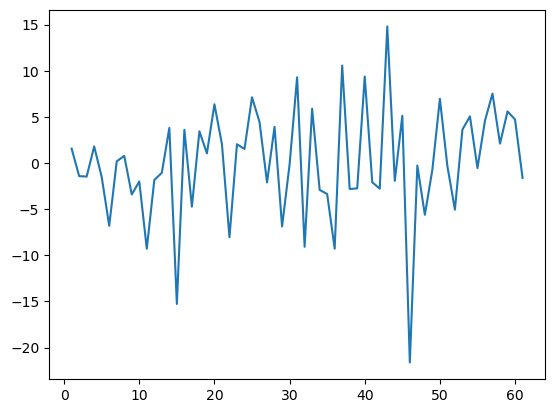

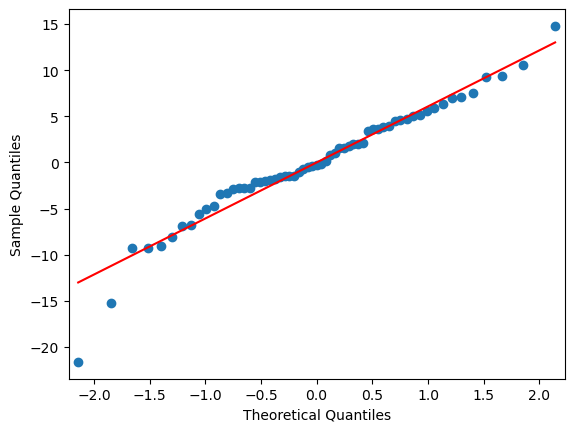

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 0.5018124992447459), ('p-value', 0.4787048065583379), ('f-value', 0.48938552836926363), ('f p-value', 0.48695058729371077)]
linearity test [('statistic', 0.48574879350968325), ('p-value', 0.9737664322906936)]
independent residual test       lb_stat  lb_pvalue
10  10.409825   0.405303


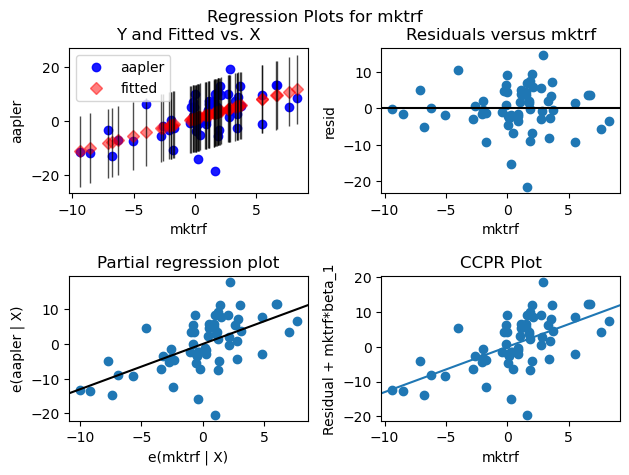

In [35]:
#test for AAPL model
# Plot the residuals
plt.plot(aapl_ind.resid)
plt.show()

# Check for normality of errors
qqplot(aapl_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(aapl_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(aapl_ind.resid, aapl_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(aapl_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(aapl_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

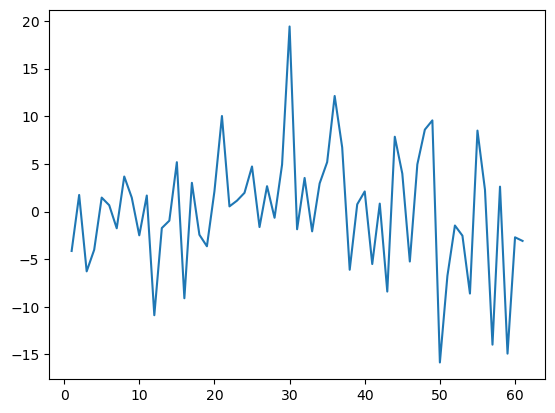

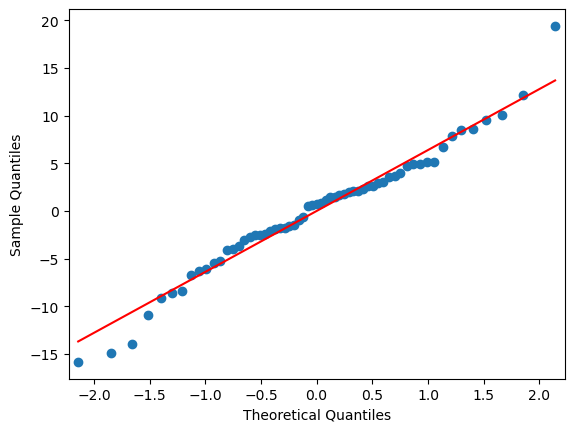

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 0.6366092824489773), ('p-value', 0.42494129877367726), ('f-value', 0.6222305807875822), ('f p-value', 0.43337791773394074)]
linearity test [('statistic', 1.4605570857735266), ('p-value', 0.15714393696209122)]
independent residual test      lb_stat  lb_pvalue
10  5.427532   0.860853


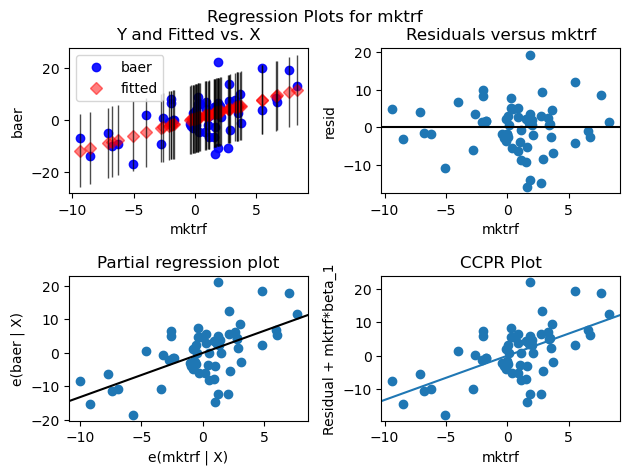

In [36]:
#test for BA model
# Plot the residuals
plt.plot(ba_ind.resid)
plt.show()

# Check for normality of errors
qqplot(ba_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(ba_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(ba_ind.resid, ba_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(ba_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(ba_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

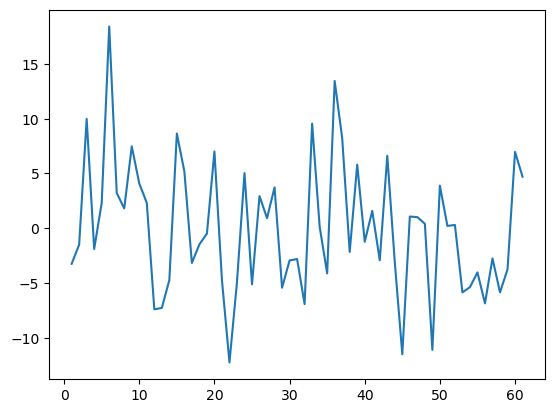

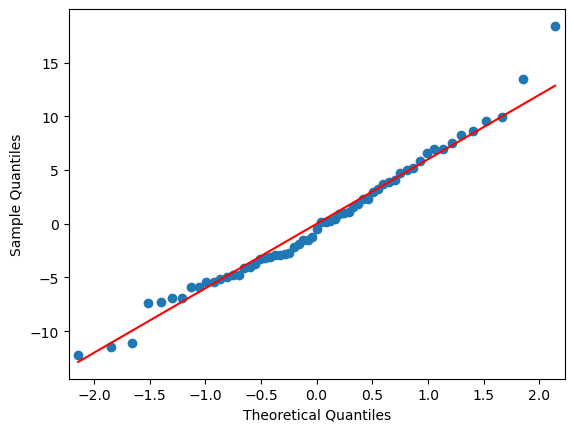

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 0.6889252068574754), ('p-value', 0.4065301984399541), ('f-value', 0.6739489777624141), ('f p-value', 0.4149829830717353)]
linearity test [('statistic', 1.1343595472180383), ('p-value', 0.3698384715312009)]
independent residual test      lb_stat  lb_pvalue
10  9.874365   0.451584


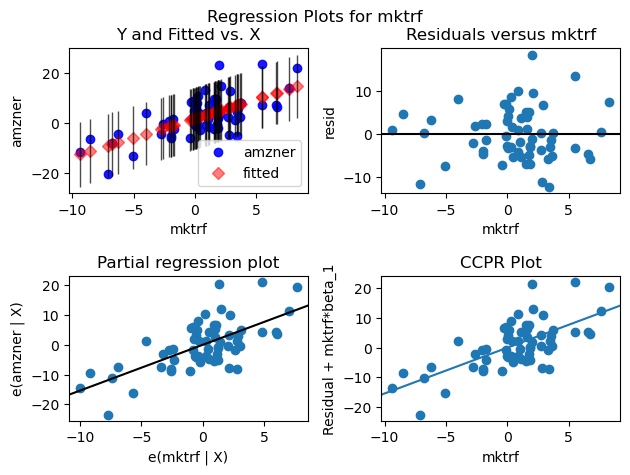

In [37]:
#test for AMZN model
# Plot the residuals
plt.plot(amzn_ind.resid)
plt.show()

# Check for normality of errors
qqplot(amzn_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(amzn_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(amzn_ind.resid, amzn_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(amzn_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(amzn_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

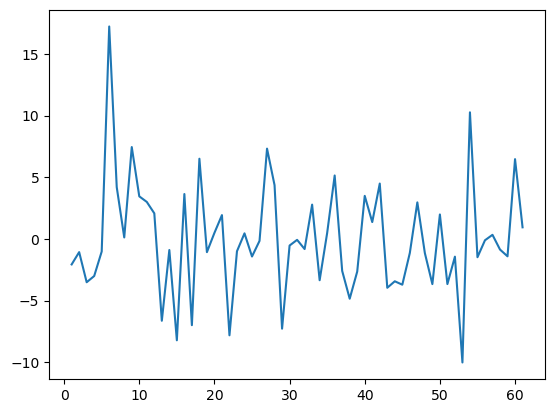

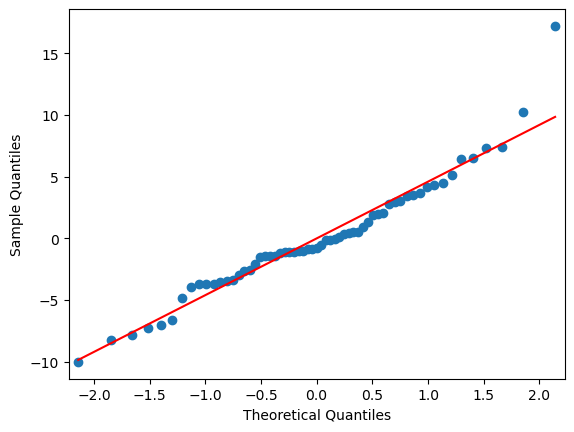

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 1.6780296550811657), ('p-value', 0.19518647084601715), ('f-value', 1.6689221392031655), ('f p-value', 0.2014406291204014)]
linearity test [('statistic', 2.0360968034673568), ('p-value', 0.030359441485895818)]
independent residual test      lb_stat  lb_pvalue
10  1.578112   0.998671


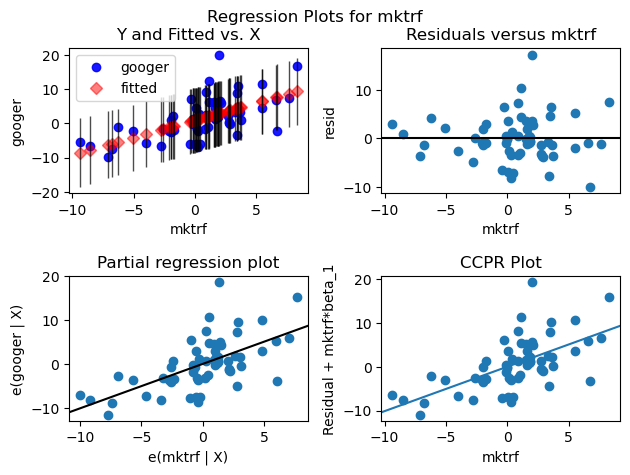

In [38]:
#test for GOOG model
# Plot the residuals
plt.plot(goog_ind.resid)
plt.show()

# Check for normality of errors
qqplot(goog_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(goog_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(goog_ind.resid, goog_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(goog_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(goog_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

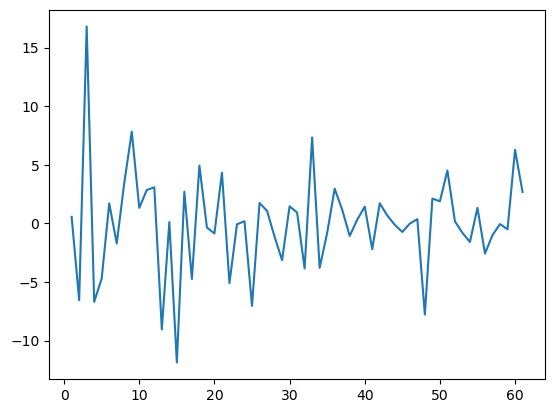

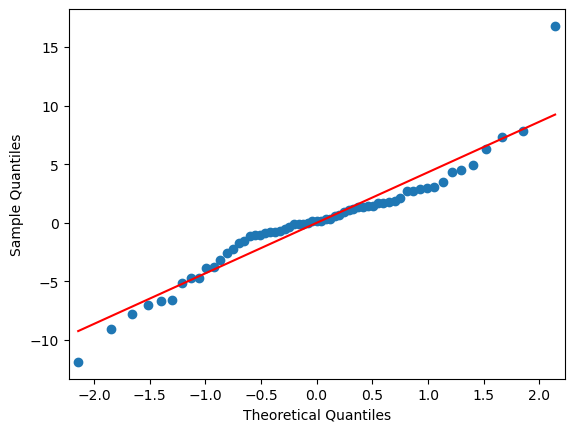

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 0.6484760026835015), ('p-value', 0.42065807584015913), ('f-value', 0.6339539024735797), ('f p-value', 0.4291008200200235)]
linearity test [('statistic', 2.9610147954898993), ('p-value', 0.0023850394963560407)]
independent residual test      lb_stat  lb_pvalue
10  13.47977    0.19807


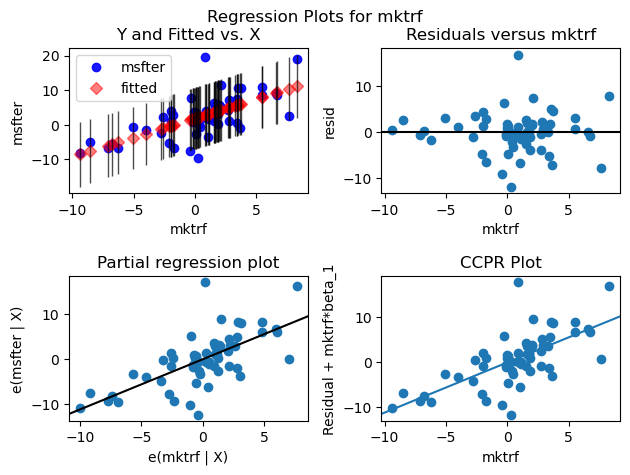

In [39]:
#test for MSFT model
# Plot the residuals
plt.plot(msft_ind.resid)
plt.show()

# Check for normality of errors
qqplot(msft_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(msft_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(msft_ind.resid, msft_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(msft_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(msft_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

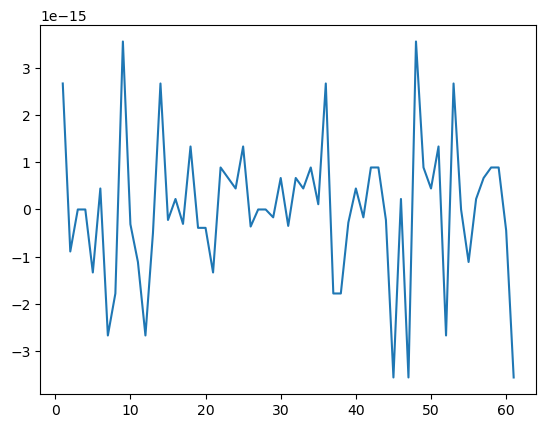

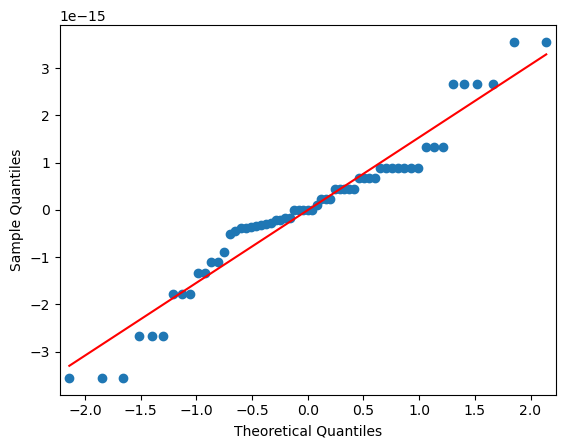

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 2.4139851728443737), ('p-value', 0.12025587920614308), ('f-value', 2.4310430674967387), ('f p-value', 0.12430211556271265)]
linearity test [('statistic', 2.051173788211451), ('p-value', 0.02907537043627998)]
independent residual test      lb_stat  lb_pvalue
10  10.65336   0.385154


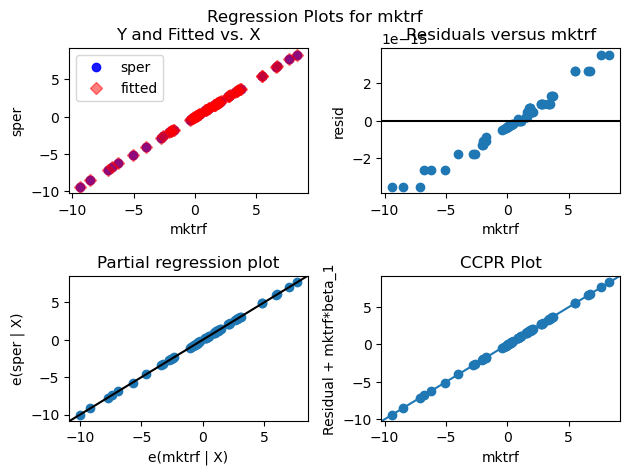

In [40]:
#test for S&P model
# Plot the residuals
plt.plot(sp_ind.resid)
plt.show()

# Check for normality of errors
qqplot(sp_ind.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(sp_ind, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(sp_ind.resid, sp_ind.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(sp_ind)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(sp_ind.resid,lags=[10])
print('independent residual test',independent_residual_test)

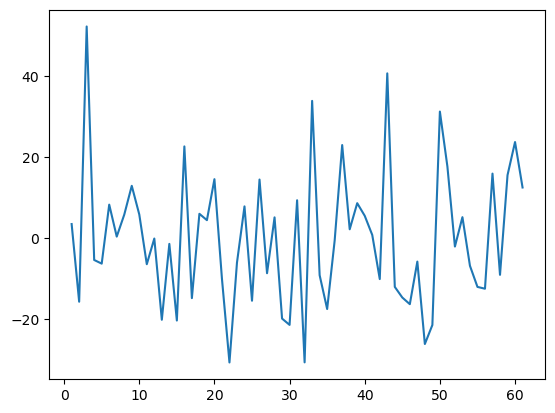

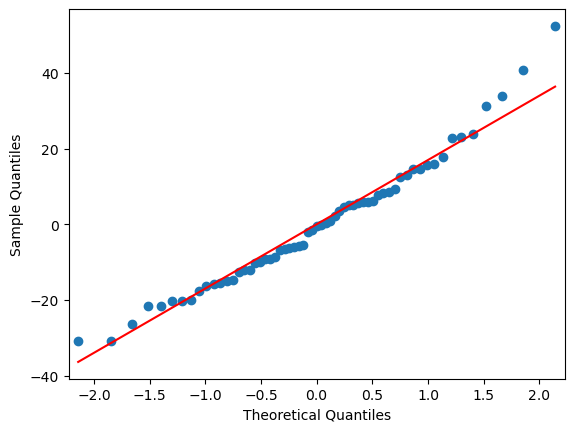

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 1.2481390478275973), ('p-value', 0.2639082069135959), ('f-value', 1.2324336455524378), ('f p-value', 0.27143842568415305)]
linearity test [('statistic', 0.9649929822828311), ('p-value', 0.5406759755995092)]
independent residual test      lb_stat  lb_pvalue
10  9.557584   0.480126


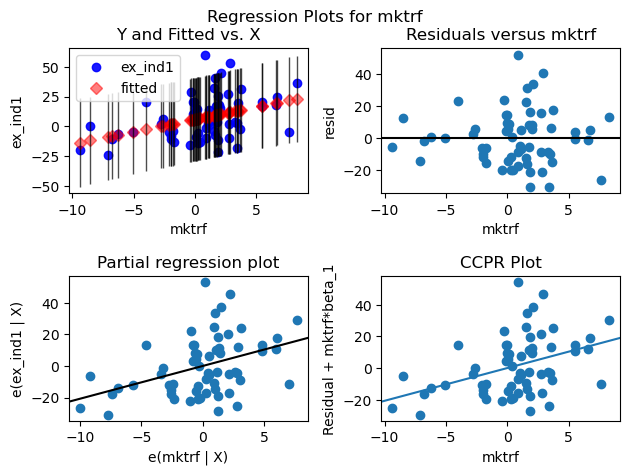

In [41]:
#test for CAPM port model
# Plot the residuals
plt.plot(capm_results.resid)
plt.show()

# Check for normality of errors
qqplot(capm_results.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(capm_results, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(capm_results.resid, capm_results.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(capm_results)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(capm_results.resid,lags=[10])
print('independent residual test',independent_residual_test)

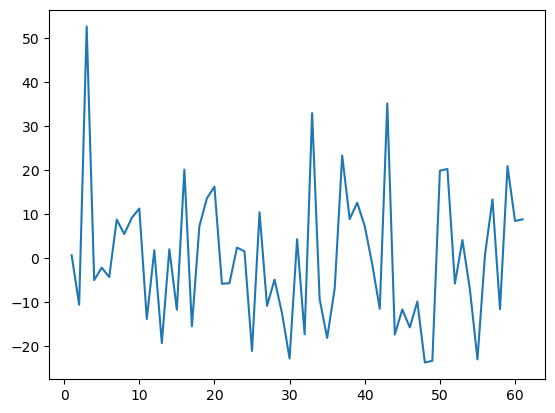

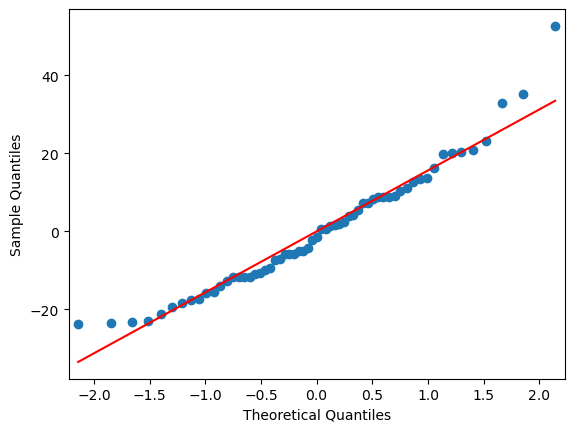

eval_env: 1
heteroscedasticity test: [('Lagrange multiplier statistic', 3.707824862924799), ('p-value', 0.44698886481035527), ('f-value', 0.9060495252056726), ('f p-value', 0.46677868565385183)]
linearity test [('statistic', 1.5478884332266674), ('p-value', 0.13300545549287385)]
independent residual test      lb_stat  lb_pvalue
10  5.907056   0.823011


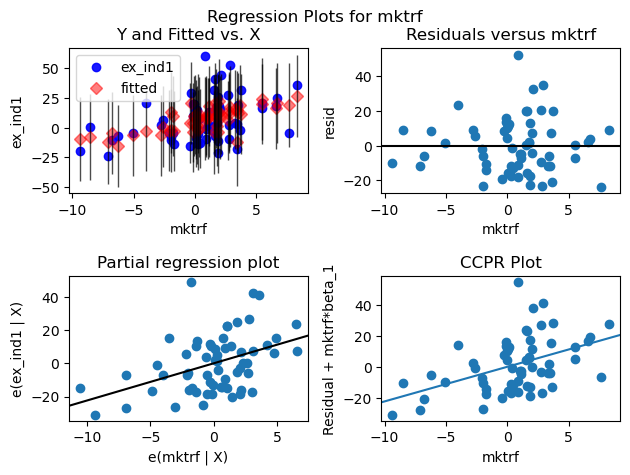

In [42]:
#test for FF 5 factor model
# Plot the residuals
plt.plot(ff_model.resid)
plt.show()

# Check for normality of errors
qqplot(ff_model.resid, line='s')
plt.show()

# check for constant variance
sm.graphics.plot_regress_exog(ff_model, 'mktrf')

heteroscedasticity = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
heteroscedasticity_test = sms.het_breuschpagan(ff_model.resid, ff_model.model.exog)
print('heteroscedasticity test:',lzip(heteroscedasticity, heteroscedasticity_test))

linearity = ['statistic', 'p-value']
linearity_test= sm.stats.diagnostic.linear_rainbow(ff_model)
print('linearity test', lzip(linearity, linearity_test))

independent_residual = ['lb_stat','lb_pvalue']
independent_residual_test = sm.stats.diagnostic.acorr_ljungbox(ff_model.resid,lags=[10])
print('independent residual test',independent_residual_test)

# 8. Ratios Comparison (CAPM / Fama French)

In [43]:
# FF method
SR =[]
TI = []
JA = []

u_f = (df_port["ex_ind1"]-df_port["rf"]).mean()
std_u_f = (df_port["ex_ind1"]-df_port["rf"]).std()
b1 = result_FF["mktrf_beta"]["FF_portfolio"]
SR.append(u_f/std_u_f)
TI.append(u_f/b1)
uMkt_urf = (df_port["mkt"]-df_port["rf"]).mean()
JA.append(u_f-b1*uMkt_urf)
    
FF_ratios = pd.DataFrame(index = ["FF_portfolio"],
                         data = {
                             "SR":SR,
                             "JA":JA,
                             "TI":TI
                         })

FF_ratios

,SR,JA,TI
FF_portfolio,0.383505,5.760994,3.197892


In [44]:
# CAPM method
SR =[]
TI = []
JA = []

u_f = (df_port["ex_ind1"]-df_port["rf"]).mean()
std_u_f = (df_port["ex_ind1"]-df_port["rf"]).std()
b1 = result_CAPM["mktrf_beta"]["CAPM_portfolio"]
SR.append(u_f/std_u_f)
TI.append(u_f/b1)
uMkt_urf = (df_port["mkt"]-df_port["rf"]).mean()
JA.append(u_f-b1*uMkt_urf)
    
result_CAPM = pd.DataFrame(index = ["CAPM_portfolio"],
                         data = {
                             "SR":SR,
                             "JA":JA,
                             "TI":TI
                         })

result_CAPM

,SR,JA,TI
CAPM_portfolio,0.383505,5.865028,3.4549


# 9. Individual Perfomance Comparison (Pre / Post Covid)

In [45]:
#sharep of the MKT

# Calculate the mean return
MKT_return = df_ff['mkt'].mean()
# Calculate the standard deviation of the returns
MKT_std = df_ff['mkt'].std()
# Calculate the excess return by subtracting the risk-free rate from the mean return
mkt_excess = MKT_return - df_ff['rf'].mean()
# Calculate the Sharpe ratio
MKT_sharpe = mkt_excess / MKT_std
print(MKT_sharpe)

0.1738730321090438


In [46]:
#Jensen alpha
# Calculate the beta of the investment
covariance_jen = df_ff['mkt'].cov(df_ff['mkt'])
index_std_dev_jen = df_ff['mkt'].std()
beta = covariance_jen / (index_std_dev_jen ** 2)

# Calculate the excess return of the investment over the expected return of the benchmark index, adjusted for the beta
excess_return = (df_ff['mkt'].mean() - (df_ff['rf'].mean()) - (beta * (df_ff['mkt'].mean() - df_ff['rf'].mean())))

# Calculate Jensen's alpha
alpha = excess_return

print(alpha)

1.1102230246251565e-16


In [47]:
#treynor index
# Calculate the beta of the investment
tre_covariance =df_ff['mkt'].cov(df_ff['mkt'])
tre_market_std_dev = df_ff['mkt'].std()
tre_beta = tre_covariance / (tre_market_std_dev ** 2)

# Calculate the excess return by subtracting the risk-free rate from the mean return
tre_excess_return = df_ff['mkt'].mean() - df_ff['rf'].mean()

# Calculate the Treynor ratio
treynor_ratio = tre_excess_return / tre_beta

print(treynor_ratio)

0.6246592603929162


# 9. Portofolio Perfomance Comparison (Pre / Post Covid)

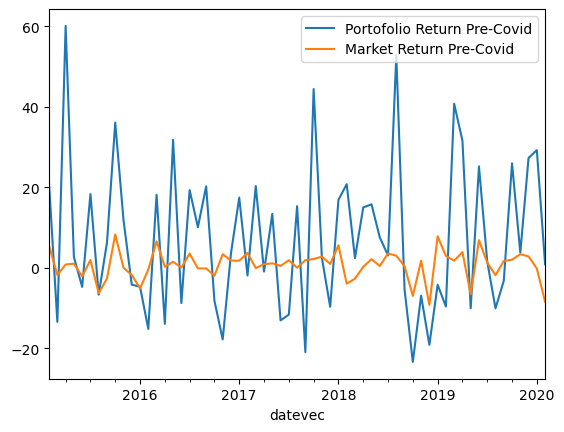

In [48]:
#before
# create the figure and axes objects
fig, ax = plt.subplots()
# plot each column as a separate line
df_port.plot(x='datevec', y='r1', ax=ax, label='Portofolio Return Pre-Covid')
df_port.plot(x='datevec', y='mkt', ax=ax, label='Market Return Pre-Covid')
# add a legend
ax.legend()

# show the plot
plt.show()

In [49]:
#after
aft_covid_prc['Ret_After'] = (
    100*(aft_covid_prc['AAPL']/aft_covid_prc['AAPL'].shift(1)-1) * max_ret_port.iloc[2] +
    100*(aft_covid_prc['BA']/aft_covid_prc['BA'].shift(1)-1) * max_ret_port.iloc[3] +
    100*(aft_covid_prc['AMZN']/aft_covid_prc['AMZN'].shift(1)-1) * max_ret_port.iloc[4] +
    100*(aft_covid_prc['GOOG']/aft_covid_prc['GOOG'].shift(1)-1) * max_ret_port.iloc[5] +
    100*(aft_covid_prc['MSFT']/aft_covid_prc['MSFT'].shift(1)-1) * max_ret_port.iloc[6] +
    100*(aft_covid_prc['S&P']/aft_covid_prc['S&P'].shift(1)-1) * max_ret_port.iloc[7] 
   )

#aft_covid_prc['Ret_After'] = 100*(aft_covid_prc['Prc_After']/aft_covid_prc['Prc_After'].shift(1)-1)
aft_covid_prc['Ret_mkt'] = 100*(aft_covid_prc['S&P']/aft_covid_prc['S&P'].shift(1)-1)

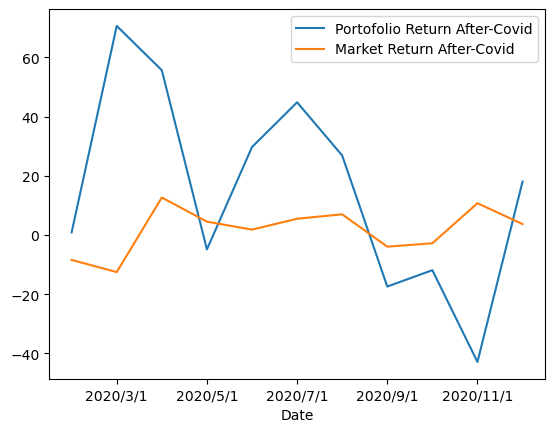

In [50]:
#after
aft_covid_prc = aft_covid_prc.reset_index()
# create the figure and axes objects

fig, ax = plt.subplots()
# plot each column as a separate line
aft_covid_prc.plot(x='Date', y='Ret_After', ax=ax, label='Portofolio Return After-Covid')
aft_covid_prc.plot(x='Date', y='Ret_mkt', ax=ax, label='Market Return After-Covid')
# add a legend
ax.legend()

# show the plot
plt.show()